In [1]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
from glob2 import glob
from scipy import signal
from scipy.io import wavfile

# Steps:
1.  Created the conda environment on my machine.
2.  Installed numpy and pillow and matplotlib.
3.  Created 5 coloured images on the cited pixel art creator.
4.  Downloaded the images into the "pictures" directory named: "Pixel_Art_0" ... "Pixel_Art_4" (I made this myself, as I am an artist).
5.  Put the images' pixel information into numpy arrays, then plotted them with matplotlib.
6.  Calculated the average and standard deviation for each picture, then manipulated them to have an average of 0 (close to it anyway...) and a standard deviation of 1.
7.  Installed scipy and librosa (I tried both).
8.  Downloaded a free audio sample from soundcloud as clang.wav (I tried it with the bruh_sound_effect but it was too short for it to be useful)
9.  Plotted the spectrogram with matplotlib
10. Downloaded the "https://en.wikipedia.org/wiki/Deep_learning" webpages text.
11. Removed removed all non-letters from the text, and converted it all to lower case, and sorted the dictionary to in alphabetical order.
12. Plotted the resulting dictionary with matplot lib. (I am not sure about this last part because I used bar() so it's not a histogram per se)
13. Added comments and documentation (fun read 5/7).

## Pixel art creator:
http://pixelartmaker.com/offshoot/c0346ba1d488d5a

# 1st Task:


###  Importing first image:

In [2]:
# Open the image from working directory
test_image = Image.open('pictures/pixel_art_0.png')
# summarize some details about the image
print(test_image.format)
print(test_image.size)
print(test_image.mode)
# show the image
##image.show()

PNG
(128, 128)
RGBA


### Converting to a numpy array:

In [3]:
# Testing first
data = np.asarray(test_image)

print(type(data))

print(data.shape)

##print(data)

<class 'numpy.ndarray'>
(128, 128, 4)


# Dynamic load from directory


In [4]:
# array of numpy arrays
image_array = []

# For every picture in the pictures directory
for pixel_art in os.listdir('pictures'):
    
    # Load single image, while converting to RGB so we only have 3 dimensions as we don't need an alpha value
    temp_image = Image.open('pictures/' + pixel_art).convert('RGB')
    
    # Convert to a numpy array
    temp_data = np.asarray(temp_image)
    
    # Add numpy array of the 
    image_array.append(temp_data)
    
    # Every piece of code is beautiful and useful...:
    print(pixel_art + ": ")
    
    # Checking Type
    print(type(temp_data))
    
    # Checking Shape
    print(temp_data.shape)
    
    # Printing the numpy array to check its contents
    print(temp_data)
    
    # Fromage, I mean format:
    print()

pixel_art_0.png: 
<class 'numpy.ndarray'>
(128, 128, 3)
[[[ 30 199 250]
  [ 30 199 250]
  [ 30 199 250]
  ...
  [ 30 199 250]
  [ 30 199 250]
  [ 30 199 250]]

 [[ 30 199 250]
  [ 30 199 250]
  [108 250   0]
  ...
  [108 250   0]
  [ 30 199 250]
  [ 30 199 250]]

 [[ 30 199 250]
  [250  15  15]
  [ 30 199 250]
  ...
  [ 30 199 250]
  [242 250   0]
  [ 30 199 250]]

 ...

 [[ 30 199 250]
  [250  15  15]
  [ 30 199 250]
  ...
  [ 30 199 250]
  [242 250   0]
  [ 30 199 250]]

 [[ 30 199 250]
  [ 30 199 250]
  [ 17   0 250]
  ...
  [ 17   0 250]
  [ 30 199 250]
  [ 30 199 250]]

 [[ 30 199 250]
  [ 30 199 250]
  [ 30 199 250]
  ...
  [ 30 199 250]
  [ 30 199 250]
  [ 30 199 250]]]

pixel_art_1.png: 
<class 'numpy.ndarray'>
(128, 128, 3)
[[[250  75 198]
  [250  75 198]
  [250  75 198]
  ...
  [250  75 198]
  [250  75 198]
  [250  75 198]]

 [[250  75 198]
  [250  75 198]
  [108 250   0]
  ...
  [108 250   0]
  [250  75 198]
  [250  75 198]]

 [[250  75 198]
  [250  15  15]
  [ 30 199 250]
 

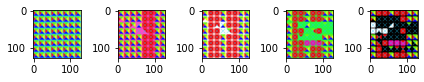

In [5]:
# Dimensions of the loaded pictures (128 * 128)
width = 128
height = 128

# Plot them next to each other (single row), and we have 5 pictures, this could be dynamic too len(image_array) TODO! 
rows = 1
cols = 5

# Creating a fig so we can have subplots
fig=plt.figure()

# Iterate over all the loaded pictures
counter = 0
for i in range(1, cols * rows + 1):
    # Add a single image to a new subplot
    img = image_array[counter]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img)
    counter = counter + 1

# Show the fig figure with all the subplots
fig.tight_layout()    
plt.show()

# 2nd task
## Finding the average and standard deviation of each picture then moving them to 0 and 1 respectively

In [6]:
# Testing testing 1, 2, 3...
a = np.array([[20,20,20],[30,40,50],[100,100,100],[100,100,100]])
print(a)
print(a.mean(axis=0))

[[ 20  20  20]
 [ 30  40  50]
 [100 100 100]
 [100 100 100]]
[62.5 65.  67.5]


In [7]:
# To help with labeling in the output
x = 0

# Iterate over all the pictures in our array of numpy arrays (pictures)
for i in image_array:
    # Slicing the array into the 3 dimensions: red, green, blue 
    red = i[:,:,0]
    green = i[:,:,1]
    blue = i[:,:,2]
    
    # Label for each picture
    print(str(x) + ". pic. :")
    x += 1
    
    # The average value of red
    print("Red avg: " + str(np.mean(np.mean(red, axis=1))))
    
    # The standard deviation of red
    print("Red standard deviation: " + str(np.std(red)))
    
    
    # The average value of green
    print("Green avg: " + str(np.mean(np.mean(green, axis=1))))
    
    # The standard deviation of green
    print("Green standard deviation:" + str(np.std(green)))
    
    
    # The average value of blue
    print("Blue avg: " + str(np.mean(np.mean(blue, axis=1))))
    
    # The standard deviation of blue
    print("Blue standard deviation:" + str(np.std(blue)))
    
    # Print a line for "clarity"
    print()


0. pic. :
Red avg: 111.5390625
Red standard deviation: 98.44548795714861
Green avg: 152.8984375
Green standard deviation:103.82503610670499
Blue avg: 129.4140625
Blue standard deviation:122.58546300335163

1. pic. :
Red avg: 184.9898681640625
Red standard deviation: 94.41877745975287
Green avg: 101.1617431640625
Green standard deviation:99.66757900626057
Blue avg: 109.1502685546875
Blue standard deviation:109.43131475429536

2. pic. :
Red avg: 199.7509765625
Red standard deviation: 88.02159685394375
Green avg: 129.678955078125
Green standard deviation:118.78694462918821
Blue avg: 113.902587890625
Blue standard deviation:122.27279295339227

3. pic. :
Red avg: 123.4111328125
Red standard deviation: 103.57611045656468
Green avg: 148.52325439453125
Green standard deviation:116.93566303029499
Blue avg: 69.32373046875
Blue standard deviation:84.82733962123541

4. pic. :
Red avg: 87.0062255859375
Red standard deviation: 111.75155150153348
Green avg: 57.01318359375
Green standard deviation:99.

### Moving the average to 0 and changin the standard deviation to 1

In [8]:
# Creating three new arrays, so we don't have to worry about reruns, this was only important while working on it.
# These arrays will have an average of 0 and a standard deviation of 1!
reds = []
greens = []
blues = []

# Iterate over all the pictures in our array of numpy arrays (pictures) (AGAIN!!!)
for i in image_array:
    # Calculate the new values of the reds in each picture
    red = i[:,:,0]
    # Subtract the average then divide by the standard deviation
    red = (red - np.mean(np.mean(red, axis=1))) / np.std(red)
    
    green = i[:,:,1]
    # Subtract the average then divide by the standard deviation
    green = (green - np.mean(np.mean(green, axis=1))) / np.std(green)
    
    blue = i[:,:,2]
    # Subtract the average then divide by the standard deviation
    blue = (blue - np.mean(np.mean(blue, axis=1))) / np.std(blue)
    
    
    # Put the modified values into the "reds" array
    reds.append(red)
    
    # Put the modified values into the "greens" array
    greens.append(green)
    
    # Put the modified values into the "blues" array
    blues.append(blue)
    

# Checking the outcome!
### The outcomes show that I was successful, the average isn't EXACTLY 0 because of numerical errors, but I think 10^-17 is close enough to 0 in this context...

In [9]:
# Calculate the average and the standard deviation again for the new numpy arrays, it's not pretty but it seems to work...
for i in range(0,len(reds)):
    print(str(i) + ". images reds:")
    print(np.average(reds[i]))
    print(np.std(reds[i]))
    print()
    
    print(str(i) + ". images greens:")
    print(np.average(greens[i]))
    print(np.std(greens[i]))
    print()
    
    print(str(i) + ". images blues:")
    print(np.average(blues[i]))
    print(np.std(blues[i]))
    print("-----------")

0. images reds:
1.3877787807814457e-17
1.0

0. images greens:
1.3877787807814457e-16
1.0

0. images blues:
-1.1102230246251565e-16
0.9999999999999999
-----------
1. images reds:
3.8163916471489756e-17
1.0

1. images greens:
4.5102810375396984e-17
1.0

1. images blues:
1.0061396160665481e-16
1.0
-----------
2. images reds:
-1.214306433183765e-17
1.0

2. images greens:
-2.42861286636753e-17
0.9999999999999999

2. images blues:
6.245004513516506e-17
1.0
-----------
3. images reds:
-2.7755575615628914e-17
1.0

3. images greens:
-6.245004513516506e-17
0.9999999999999999

3. images blues:
-6.591949208711867e-17
1.0
-----------
4. images reds:
-2.0816681711721685e-17
1.0

4. images greens:
2.7755575615628914e-17
0.9999999999999999

4. images blues:
4.336808689942018e-17
1.0
-----------


# 3rd Task
## Audio input and spectogram output

##### Generous audio donor: https://soundcloud.com/suede-wolf/somber

In [10]:
# Specifying the path to the audio file
# This could later be used for more than one file
audio_fpath = "audio/"
audio_clips = os.listdir(audio_fpath)

#Checking number of files in the directory
print("No. of .wav files in audio folder = ",len(audio_clips))

# Printing the names of the files in the directory
audio_clips

No. of .wav files in audio folder =  1


['clang.wav']

In [11]:
# Load the audio file

sampling_rate,signal_data= wavfile.read(audio_fpath+audio_clips[0])

# Making the data mono, if we don't do this we will have (VERY) frustrating problems...
signal_data = signal_data[:,0]

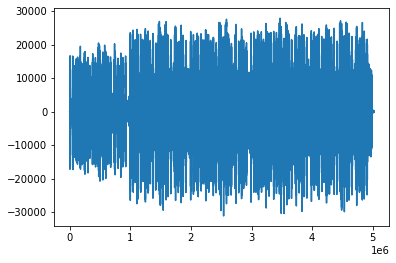

In [12]:
# Plotting this for some reason
plt.plot(signal_data)
plt.show()

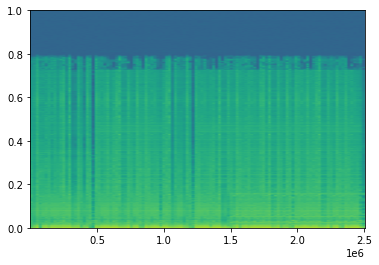

In [13]:
# Plotting the spectrogram
plt.specgram(signal_data, sampling_rate)
plt.show()

# 4. Task:
### Load text from the deep learning wikipedia page

In [14]:
# This makes it easy
import wikipedia

In [15]:
# Scraping the page we didn't really need the "https://en.wikipedia.org/wiki/Deep_learning" URL
wiki = wikipedia.page('Deep learning')

In [16]:
# loaded the content into the "text" string
text = wiki.content

# Using regex to filter out non-Alphabetical values
import re

# Creating the regular expression (All upper and lower case letters (we could have used text.lower here instead, but this works too))
regex = re.compile('[^a-zA-Z]')

# Running the filter on "text"
text = regex.sub('', text)

In [17]:
# from string import ascii_lowercase //oops don't need this

# Import Counter from collections to count individual letters
from collections import Counter

# Convert the text to lower and count the letters
c = Counter(text.lower())

# Sort the dictionary's keys alphabetically
c_sorted = sorted(c)

# Used for checking it needs to be in a print since it's not on the last line of this cell
c_sorted

# Create a new empty dictionary
sorted_dict = {}

# Adding the values to the sorted dictionary
for key in c_sorted:
    sorted_dict[key] = c[key]
    
# This probably exists oops...^^^

# Print the sorted dictionary
sorted_dict

{'a': 3291,
 'b': 466,
 'c': 1449,
 'd': 1446,
 'e': 4710,
 'f': 749,
 'g': 959,
 'h': 1280,
 'i': 2909,
 'j': 28,
 'k': 241,
 'l': 1631,
 'm': 1039,
 'n': 3163,
 'o': 2547,
 'p': 1002,
 'q': 24,
 'r': 2539,
 's': 2368,
 't': 3166,
 'u': 994,
 'v': 388,
 'w': 462,
 'x': 96,
 'y': 529,
 'z': 67}

## Plotting the data onto a graph

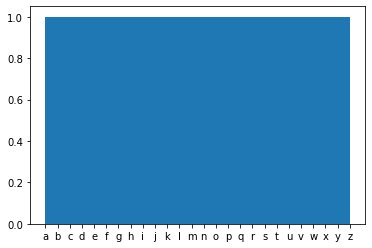

In [18]:
# Tried this but I couldn't find a solution to plat a histogram from a dictionary so i looked for another solution.
plt.hist(sorted_dict,bins = 26)
plt.show()
# Looking back this obviously doesn't work lol

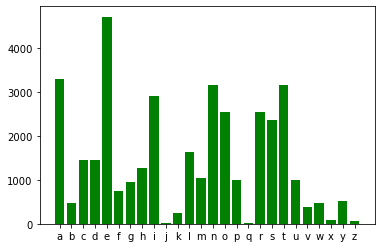

In [19]:
# I found this way to show the occurance of the letters
plt.bar(list(sorted_dict.keys()), sorted_dict.values(), color='g')
plt.show()

# End of the first "small" homework.

## It helped me scrape some of my rust with python, and I haven't really used numpy/matplotlib much more than this before so a refresher was great!


###### Disclaimer: If the comments/documentation were too informal, let me know, I'll be more boring next time!